In [68]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint


In [69]:
url = 'https://raw.githubusercontent.com/umassdgithub/Fall-2023-DataViz/main/Week-8-ForceSimulator/data/data_scopus.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      570 non-null    object 
 1   Year                       570 non-null    int64  
 2   EID                        570 non-null    object 
 3   Abstract                   570 non-null    object 
 4   Publisher                  345 non-null    object 
 5   Conference name            423 non-null    object 
 6   Conference date            423 non-null    object 
 7   Authors                    570 non-null    object 
 8   Author(s) ID               570 non-null    object 
 9   Authors with affiliations  561 non-null    object 
 10  Source title               570 non-null    object 
 11  Abbreviated Source Title   568 non-null    object 
 12  Cited by                   385 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 

In [178]:
df.head(2)

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by,First_author_Country
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,0,0,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,0.0,Canada
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,0,0,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,0.0,Italy


In [179]:
df= df[~pd.isnull(df['Authors with affiliations'])].copy()
#nodes=df['EID'].values
df=df.fillna(0)

In [109]:
nodes

array(['2-s2.0-85086464158', '2-s2.0-85082875828', '2-s2.0-85078194587',
       '2-s2.0-85075706132', '2-s2.0-85074886243', '2-s2.0-85071686342',
       '2-s2.0-85077803554', '2-s2.0-85070952871', '2-s2.0-85071875225',
       '2-s2.0-85066064473', '2-s2.0-85063859157', '2-s2.0-85063078841',
       '2-s2.0-85063991540', '2-s2.0-85048596114', '2-s2.0-85060755230',
       '2-s2.0-85063381572', '2-s2.0-85054900269', '2-s2.0-85058785147',
       '2-s2.0-85080099656', '2-s2.0-85080075264', '2-s2.0-85073393862',
       '2-s2.0-85073324217', '2-s2.0-85073363313', '2-s2.0-85073347935',
       '2-s2.0-85073353158', '2-s2.0-85073324914', '2-s2.0-85073353042',
       '2-s2.0-85065667658', '2-s2.0-85046748820', '2-s2.0-85073695607',
       '2-s2.0-85058126143', '2-s2.0-85054036088', '2-s2.0-85056555992',
       '2-s2.0-85053193314', '2-s2.0-85029416722', '2-s2.0-85049333099',
       '2-s2.0-85049348491', '2-s2.0-85051602278', '2-s2.0-85043298716',
       '2-s2.0-85050561713', '2-s2.0-85027892477', 

In [110]:
def get_first_author_affilation(x):
  try:
    return x.split(";")[0].split(",")[-1].strip()
  except Exception as ex:
    print(x)
df['First_author_Country']=df['Authors with affiliations'].apply(get_first_author_affilation)

In [182]:
pd.set_option('display.max_colwidth', None)

In [183]:
df[:1]['Authors with affiliations']

0    Zhang, Y., Department of Civil and Environmental Engineering, University of Alberta, Edmonton, AB  T6G 1H9, Canada; Liu, H., Department of Civil and Construction Engineering, Western Michigan University, Kalamazoo, MI  49008-5316, United States; Kang, S.-C., Department of Civil and Environmental Engineering, University of Alberta, Edmonton, AB  T6G 1H9, Canada; Al-Hussein, M., Department of Civil and Environmental Engineering, University of Alberta, Edmonton, AB  T6G 1H9, Canada
Name: Authors with affiliations, dtype: object

In [165]:
G=nx.Graph()

In [190]:
def getCountry(author_id):
  df_temp = df.copy()
  rowIndex = 0;
  # Iterrates through every row of the dataframe until the first occurance of the authorID that was passed is found
  for row in df_temp.iterrows():
    # Error is thrown if author is not in the row, so a try is used
    try:
      index = df_temp.iloc[rowIndex]['Author(s) ID'].split(";").index(author_id)
      country = df_temp.iloc[rowIndex]['Authors with affiliations'].split(";")[index].split(",")[-1].strip()
      # Some authors have no affiliated country (have university or initial instead). "United States" is imputed for these
      if (len(country) > 15) or (len(country) <= 2):
        country = "United States"
      return country
    except:
      # Counter to get proper row index. Only increments to next row if author was not found in current row
      rowIndex += 1
      continue

In [191]:
nodes=[]

for row in df.iterrows():
  if ";" in row[1]['Author(s) ID'] and "," in row[1]['Authors']: 
    authors = row[1]['Author(s) ID'][:-1].split(";")
    
    #if "," in row[1]['Authors']:
    author_names = row[1]['Authors'][:-1].split(",")
    Country_name=row[1]['Authors with affiliations'][:-2].split(",")
    for author, name,country in zip(authors, author_names,Country_name):
        nodes.append((author,{
               # "Title": row[1]['Title'],
                #"Year" : row[1]['Year'],
                #"Citations" : row[1]['Cited by'],
                "Name":name,
            "Country":getCountry(author)}))
             
                
        
            
            

    

In [192]:
nodes

[('57202536919', {'Name': 'Zhang Y.', 'Country': 'Canada'}),
 ('53984550800', {'Name': ' Liu H.', 'Country': 'United States'}),
 ('57215426514', {'Name': ' Kang S.-C.', 'Country': 'Canada'}),
 ('6603541102', {'Name': ' Al-Hussein M', 'Country': 'Canada'}),
 ('23398572100', {'Name': 'Rapp A.', 'Country': 'Italy'}),
 ('57191836654', {'Name': ' Tirabeni L', 'Country': 'Italy'}),
 ('57205293410', {'Name': 'Isailović D.', 'Country': 'Serbia'}),
 ('56421700900', {'Name': ' Stojanovic V.', 'Country': 'Germany'}),
 ('24831175200', {'Name': ' Trapp M.', 'Country': 'Germany'}),
 ('36195159400', {'Name': ' Richter R.', 'Country': 'Germany'}),
 ('6507346536', {'Name': ' Hajdin R.', 'Country': 'Serbia'}),
 ('6602981892', {'Name': ' Döllner J', 'Country': 'Germany'}),
 ('57201502480', {'Name': 'Okada K.', 'Country': 'Japan'}),
 ('57171240600', {'Name': ' Yoshida M.', 'Country': 'Japan'}),
 ('35373203100', {'Name': ' Itoh T.', 'Country': 'Japan'}),
 ('25925695500', {'Name': ' Czauderna T.', 'Country'

In [193]:
G.add_nodes_from(nodes)

In [194]:
edges = []
for row in df.iterrows():
    if ";" in row[1]['Author(s) ID']: 
        authors = row[1]['Author(s) ID'][:-1].split(";")
        for cur_author in authors:
                for a in authors:
                    if a!=cur_author:
                        edges.append((cur_author,a))
          
  
                
 
   


In [195]:
G.add_edges_from(edges)

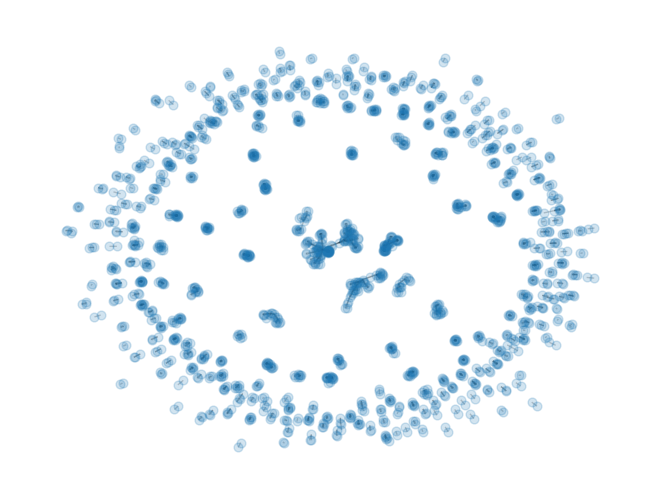

In [198]:
pos = nx.drawing.spring_layout(G)
nx.draw(G,pos=pos, node_size=40,alpha=.2)

In [199]:
from networkx.readwrite import json_graph

In [200]:
with open("publication_network.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)

In [201]:
nx.write_gml(G,"network.gml")

In [202]:
import json

# Specify the path to your JSON file
json_file_path = 'publication_network.json'

# Open the file and load the JSON data
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

# Now, 'data' contains the contents of the JSON file as a Python dictionary
print(data)

{'directed': False, 'multigraph': False, 'graph': {}, 'nodes': [{'Country': 'Canada', 'Name': 'Zhang Y.', 'id': '57202536919'}, {'Country': 'United States', 'Name': ' Liu H.', 'id': '53984550800'}, {'Country': 'Canada', 'Name': ' Kang S.-C.', 'id': '57215426514'}, {'Country': 'Canada', 'Name': ' Al-Hussein M', 'id': '6603541102'}, {'Country': 'Italy', 'Name': 'Rapp A.', 'id': '23398572100'}, {'Country': 'Italy', 'Name': ' Tirabeni L', 'id': '57191836654'}, {'Country': 'Serbia', 'Name': 'Isailović D.', 'id': '57205293410'}, {'Country': 'Germany', 'Name': ' Stojanovic V.', 'id': '56421700900'}, {'Country': 'Germany', 'Name': ' Trapp M.', 'id': '24831175200'}, {'Country': 'Germany', 'Name': ' Richter R.', 'id': '36195159400'}, {'Country': 'Serbia', 'Name': ' Hajdin R.', 'id': '6507346536'}, {'Country': 'Germany', 'Name': ' Döllner J', 'id': '6602981892'}, {'Country': 'Japan', 'Name': 'Okada K.', 'id': '57201502480'}, {'Country': 'Japan', 'Name': ' Yoshida M.', 'id': '57171240600'}, {'Coun